# Linear Regression Practicals on Stock Prediction Dataset

## Practical 1: Simple Linear Regression
- Dataset: Stock Closing Prices (e.g., TVSMOTOR.NS)
- Feature: Day number (time index)
- Target: Closing Price
- Task: Fit a simple regression line and evaluate using MSE, RMSE, R²

In [22]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/var/folders/26/ff0xxzbd731d59yvrvgz3jgm0000gn/T/ipykernel_46748/3823753541.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TVSMOTOR.NS", start="2022-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

MSE: 4352.8498466793435
RMSE: 65.97613088594498
R²: 0.879602596113062


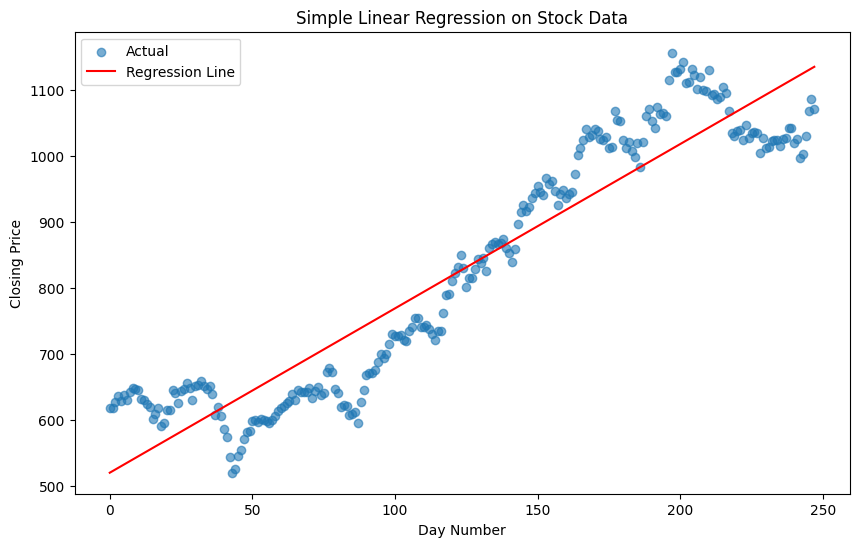

In [1]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Download stock data
data = yf.download("TVSMOTOR.NS", start="2022-01-01", end="2023-01-01")
data.reset_index(inplace=True)

# Feature: day number, Target: closing price
data['Day'] = np.arange(len(data))
X = data[['Day']]
y = data['Close']

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Actual", alpha=0.6)
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("Day Number")
plt.ylabel("Closing Price")
plt.legend()
plt.title("Simple Linear Regression on Stock Data")
plt.show()


## Practical 2: Gradient Descent Implementation
- Implement Linear Regression manually using Gradient Descent
- Visualize cost function convergence

Final Theta0: -1.5115111164038561e+173
Final Theta1: -3.4362567917020397e+157


/Users/jayantparmar/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/26/ff0xxzbd731d59yvrvgz3jgm0000gn/T/ipykernel_46748/3959314546.py:21: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(error**2)


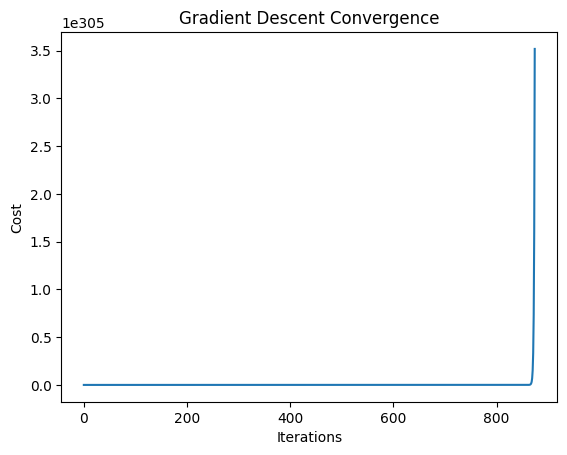

In [2]:

# Gradient Descent implementation for stock prices
X = data['Day'].values.reshape(-1,1)
y = data['Close'].values

# Normalize features
X_norm = (X - X.mean()) / X.std()

# Hyperparameters
alpha = 0.01
iterations = 1000
m = len(y)
theta0, theta1 = 0, 0

cost_history = []

for _ in range(iterations):
    y_pred = theta0 + theta1 * X_norm.flatten()
    error = y_pred - y
    theta0 -= alpha * (1/m) * np.sum(error)
    theta1 -= alpha * (1/m) * np.sum(error * X_norm.flatten())
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)

print("Final Theta0:", theta0)
print("Final Theta1:", theta1)

# Plot cost convergence
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.show()


## Practical 3: Multivariate Linear Regression
- Features: Open, High, Low, Volume
- Target: Close
- Train Linear Regression and evaluate

In [3]:

features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Close']

model_multi = LinearRegression()
model_multi.fit(X, y)
y_pred_multi = model_multi.predict(X)

mse_multi = mean_squared_error(y, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y, y_pred_multi)

print("Multivariate MSE:", mse_multi)
print("Multivariate RMSE:", rmse_multi)
print("Multivariate R²:", r2_multi)


Multivariate MSE: 37.92649405611941
Multivariate RMSE: 6.158448997606411
Multivariate R²: 0.9989509742849564


## Practical 4: Polynomial Regression
- Feature: Day number
- Compare Linear vs Polynomial Regression (degree 2, 3)

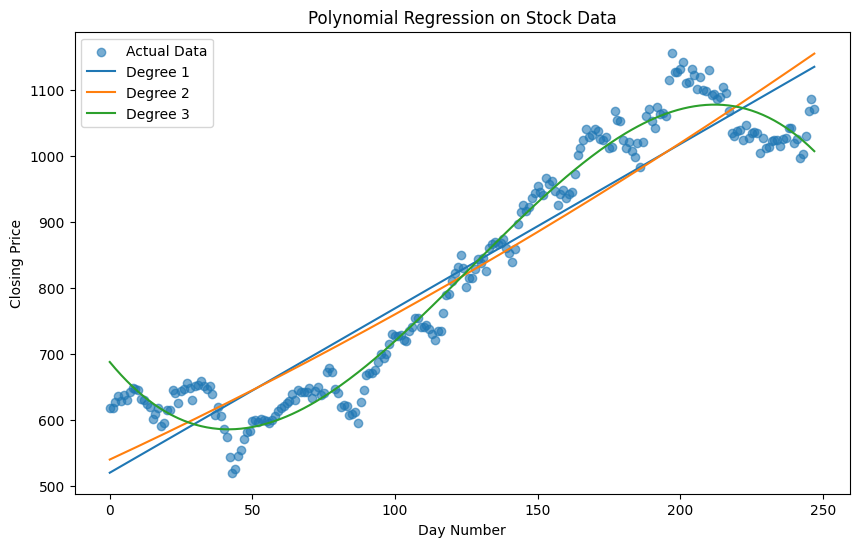

In [4]:

from sklearn.preprocessing import PolynomialFeatures

X = data[['Day']]
y = data['Close']

plt.figure(figsize=(10,6))
plt.scatter(X, y, label="Actual Data", alpha=0.6)

for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)
    y_poly_pred = model_poly.predict(X_poly)
    plt.plot(X, y_poly_pred, label=f"Degree {degree}")

plt.xlabel("Day Number")
plt.ylabel("Closing Price")
plt.title("Polynomial Regression on Stock Data")
plt.legend()
plt.show()


## Practical 5: Regularized Regression (Ridge & Lasso)
- Features: Open, High, Low, Volume
- Apply Ridge and Lasso regression

In [5]:

from sklearn.linear_model import Ridge, Lasso

features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Close']

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X, y)
lasso.fit(X, y)

print("Ridge Coefficients:", ridge.coef_)
print("Lasso Coefficients:", lasso.coef_)


Ridge Coefficients: [-5.08842877e-01  7.98255572e-01  7.04633820e-01 -1.95201944e-07]
Lasso Coefficients: [-4.25034677e-01  9.68779321e-01  4.45773709e-01 -5.01662800e-07]


/Users/jayantparmar/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.198e+03, tolerance: 8.966e+02
  model = cd_fast.enet_coordinate_descent(



## Practical 6: Feature Engineering for Better Accuracy

We improve stock price prediction by adding **lag features, moving averages, volatility, and returns** to provide more context to the model.


MSE with Feature Engineering: 23.18212438169182
RMSE with Feature Engineering: 4.8147818623164875
R² with Feature Engineering: 0.985878482034404


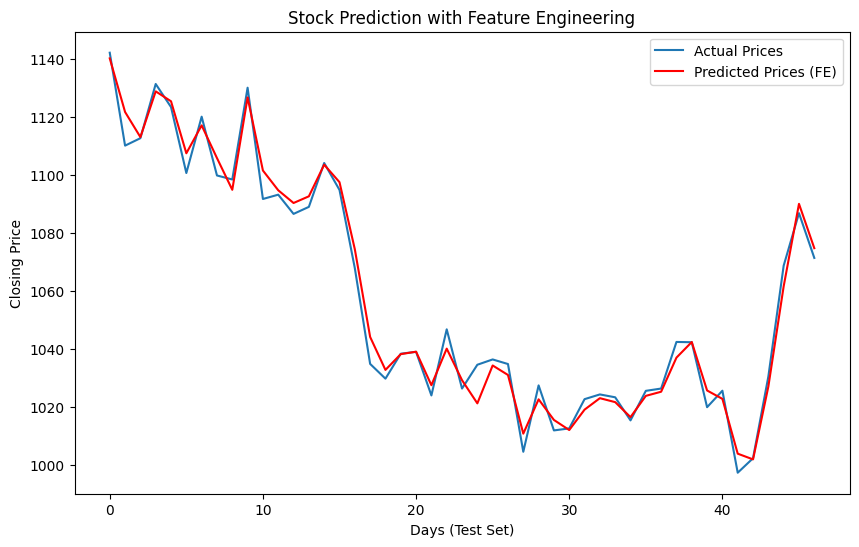

In [6]:

# Feature Engineering
data['Close_lag1'] = data['Close'].shift(1)
data['Close_lag2'] = data['Close'].shift(2)
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA14'] = data['Close'].rolling(window=14).mean()
data['Volatility'] = data['Close'].rolling(window=7).std()
data['Return'] = data['Close'].pct_change()

# Drop NaN values caused by rolling/lagging
data_fe = data.dropna()

# Features and target
features = ['Open', 'High', 'Low', 'Volume',
            'Close_lag1', 'Close_lag2',
            'MA7', 'MA14', 'Volatility', 'Return']
X = data_fe[features]
y = data_fe['Close']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Linear Regression with engineered features
model_fe = LinearRegression()
model_fe.fit(X_train, y_train)

# Predictions
y_pred_fe = model_fe.predict(X_test)

# Evaluation metrics
mse_fe = mean_squared_error(y_test, y_pred_fe)
rmse_fe = np.sqrt(mse_fe)
r2_fe = r2_score(y_test, y_pred_fe)

print("MSE with Feature Engineering:", mse_fe)
print("RMSE with Feature Engineering:", rmse_fe)
print("R² with Feature Engineering:", r2_fe)

# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Prices")
plt.plot(y_pred_fe, label="Predicted Prices (FE)", color="red")
plt.xlabel("Days (Test Set)")
plt.ylabel("Closing Price")
plt.title("Stock Prediction with Feature Engineering")
plt.legend()
plt.show()


In [29]:
# ==========================
# Practical 7: BTST Strategy
# ==========================

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from dataclasses import dataclass, field

# ---------------------------
# 1. Configurations
# ---------------------------
SYMBOL = "TVSMOTOR.NS"   # Equity ticker
LOT_SIZE = 1             # For equities (change for options lot size)
DRY_RUN = True           # Safety: prevent real broker execution

# ---------------------------
# 2. Download stock data
# ---------------------------
data = yf.download(SYMBOL, start="2022-01-01", end="2025-08-30", auto_adjust=True)
data.reset_index(inplace=True)

# ---------------------------
# 3. Feature Engineering
# ---------------------------
data['Close_lag1'] = data['Close'].shift(1)
data['Close_lag2'] = data['Close'].shift(2)
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA14'] = data['Close'].rolling(window=14).mean()
data['Volatility'] = data['Close'].rolling(window=7).std()
data['Return'] = data['Close'].pct_change()
data_fe = data.dropna()

# ---------------------------
# 4. Train Model
# ---------------------------
features = ['Open', 'High', 'Low', 'Volume',
            'Close_lag1', 'Close_lag2',
            'MA7', 'MA14', 'Volatility', 'Return']
X = data_fe[features]
y = data_fe['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model_fe = LinearRegression()
model_fe.fit(X_train, y_train)
y_pred_fe = model_fe.predict(X_test)

print("Model evaluation on test set:")
print("  MSE: ", mean_squared_error(y_test, y_pred_fe))
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_fe)))
print("  R2:  ", r2_score(y_test, y_pred_fe))

# ---------------------------
# 5. Build BTST Signal
# ---------------------------
test_index = y_test.index
y_pred_fe = np.asarray(y_pred_fe).ravel()
pred_series = pd.Series(y_pred_fe, index=test_index, name="pred_close")

fe_view = data_fe.loc[test_index, ['Date', 'Close', 'Open']].copy()
fe_view['pred_close'] = pred_series

# Always flatten to 1D arrays
pred_close_arr = fe_view['pred_close'].to_numpy().ravel()
close_arr = fe_view['Close'].to_numpy().ravel()

# Next-day predicted close
pred_close_next_arr = np.empty_like(pred_close_arr, dtype=float)
pred_close_next_arr[:] = np.nan
if pred_close_arr.size > 1:
    pred_close_next_arr[:-1] = pred_close_arr[1:]

# Predicted return
pred_return_next_arr = (pred_close_next_arr - close_arr) / close_arr

# Attach back safely, ensuring length and index match
fe_view['pred_close_next'] = pd.Series(pred_close_next_arr, index=fe_view.index)
fe_view['pred_return_next'] = pd.Series(pred_return_next_arr, index=fe_view.index)

# Drop rows with no valid next-day prediction
fe_view = fe_view.dropna(subset=['pred_close_next', 'pred_return_next']).copy()

THRESH = 0.004  # 0.4% expected gain
fe_view['btst_signal'] = (fe_view['pred_return_next'] > THRESH).astype(int)

# ---------------------------
# 6. Paper Broker Simulator
# ---------------------------
@dataclass
class Position:
    symbol: str
    qty: int
    buy_price: float
    buy_date: pd.Timestamp
    side: str = "LONG"

@dataclass
class PaperBroker:
    cash: float = 1_000_000.0
    positions: list = field(default_factory=list)
    trades: list = field(default_factory=list)

    def buy_equity(self, symbol, qty, price, date):
        self.positions.append(Position(symbol, qty, price, pd.Timestamp(date)))
        self.trades.append(dict(date=date, side="BUY", symbol=symbol, qty=qty, price=price))

    def sell_equity(self, symbol, qty, price, date):
        pos_idx = next((i for i, p in enumerate(self.positions) if p.symbol == symbol and p.qty >= qty), None)
        if pos_idx is not None:
            pos = self.positions.pop(pos_idx)
            buy_price = pos.buy_price
            pnl = (price - buy_price) * qty
        else:
            pnl = 0.0
        self.trades.append(dict(date=date, side="SELL", symbol=symbol, qty=qty, price=price, pnl=pnl))
        return pnl

    def build_option_symbol(self, underlying:str, expiry:str, strike:int, opt_type:str):
        return f"{underlying}_{expiry}_{strike}_{opt_type.upper()}"

    def place_option_order(self, symbol:str, qty:int, side:str, price:float, date):
        self.trades.append(dict(date=date, side=side.upper(), asset_type="OPTION", symbol=symbol,
                                qty=qty, price=price, note="DRY_RUN_FNO"))

broker = PaperBroker()

# ---------------------------
# 7. Simulate BTST Trades
# ---------------------------
results = []
qty = 1 * LOT_SIZE

for i, row in fe_view.iloc[:-1].iterrows():
    next_row = fe_view.iloc[fe_view.index.get_loc(i) + 1]
    if row['btst_signal'] == 1:
        buy_price = row['Close']
        sell_price = next_row['Open']
        broker.buy_equity(SYMBOL, qty, buy_price, row['Date'])
        pnl = broker.sell_equity(SYMBOL, qty, sell_price, next_row['Date'])
        results.append({
            "buy_date": row['Date'],
            "sell_date": next_row['Date'],
            "buy_price": float(buy_price),
            "sell_price": float(sell_price),
            "pnl": float(pnl),
            "ret_pct": float(pnl / buy_price * 100.0)
        })

btst_df = pd.DataFrame(results)

# ---------------------------
# 8. Evaluate Performance
# ---------------------------
if not btst_df.empty:
    total_trades = len(btst_df)
    wins = (btst_df['pnl'] > 0).sum()
    win_rate = wins / total_trades
    total_pnl = btst_df['pnl'].sum()
    avg_pnl = btst_df['pnl'].mean()
    print(f"Total trades: {total_trades}")
    print(f"Win rate: {win_rate:.2%}")
    print(f"Total P&L: {total_pnl:.2f}")
    print(f"Average P&L per trade: {avg_pnl:.2f}")
else:
    print("No BTST trades triggered with current threshold.")

# ---------------------------
# 9. Plot trades
# ---------------------------
plt.figure(figsize=(12,6))
plt.plot(fe_view['Date'], fe_view['Close'], label="Close Price")

if not btst_df.empty:
    buys = btst_df['buy_date']
    sells = btst_df['sell_date']
    plt.scatter(buys, fe_view.loc[fe_view['Date'].isin(buys), 'Close'],
                marker='^', label='BTST Buy', s=80, color="green")
    plt.scatter(sells, fe_view.loc[fe_view['Date'].isin(sells), 'Open'],
                marker='v', label='BTST Sell', s=80, color="red")

plt.title("BTST Trades (Paper Trading)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed

Model evaluation on test set:
  MSE:  192.77468777260935
  RMSE: 13.88433245685976
  R2:   0.9973963233888166


KeyError: ['pred_close_next', 'pred_return_next']

[*********************100%***********************]  1 of 1 completed


--- Starting Backtest Simulation ---
2022-02-01: BUYING 10 TVSMOTOR.NS at 614.11
2022-02-07: SELLING 10 TVSMOTOR.NS at 656.29
2022-02-22: BUYING 10 TVSMOTOR.NS at 652.36
2022-03-07: SELLING 10 TVSMOTOR.NS at 515.02
2022-04-12: BUYING 10 TVSMOTOR.NS at 648.46
2022-12-01: SELLING 10 TVSMOTOR.NS at 1036.43
2023-02-15: BUYING 10 TVSMOTOR.NS at 1101.51
2023-04-06: SELLING 10 TVSMOTOR.NS at 1090.85
2023-04-17: BUYING 10 TVSMOTOR.NS at 1163.21
2024-04-12: SELLING 10 TVSMOTOR.NS at 2002.79
2024-05-24: BUYING 10 TVSMOTOR.NS at 2250.67
2024-10-24: SELLING 10 TVSMOTOR.NS at 2491.77
2025-01-03: BUYING 10 TVSMOTOR.NS at 2477.73
2025-01-06: SELLING 10 TVSMOTOR.NS at 2410.06
2025-02-11: BUYING 10 TVSMOTOR.NS at 2489.68
2025-03-10: SELLING 10 TVSMOTOR.NS at 2237.72
2025-04-15: BUYING 10 TVSMOTOR.NS at 2589.00
--- Simulation Complete ---

--- Strategy Performance ---
Initial Portfolio Value: $100,000.00
Final Portfolio Value:   $117,102.13
Total Return:            17.10%
Annualized Sharpe Ratio: 1.16


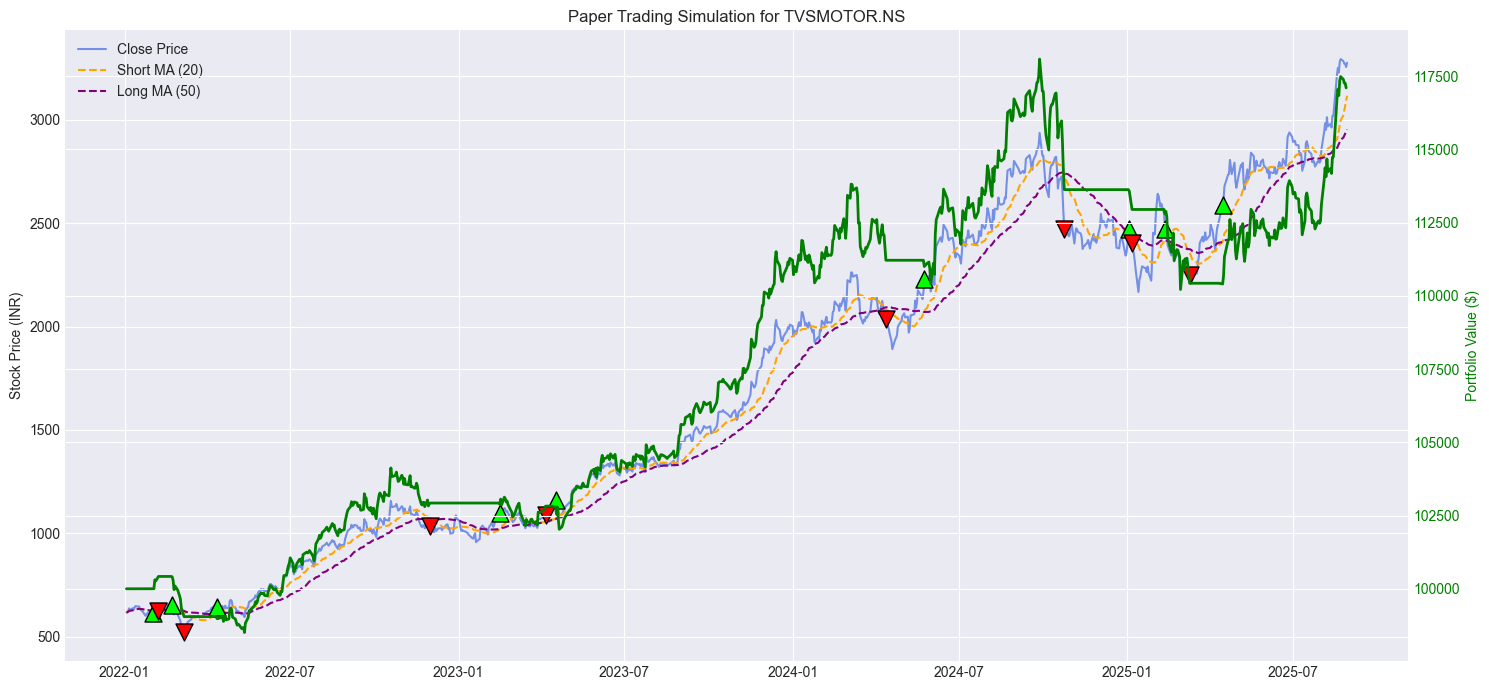

In [41]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field

# =============================================================================
# 1. PAPER BROKER SIMULATOR
# =============================================================================
@dataclass
class PaperBroker:
    """
    A class to simulate a trading brokerage account.
    It manages cash, positions, and logs all trades.
    """
    initial_cash: float = 100_000.0
    cash: float = field(init=False)
    positions: dict = field(default_factory=dict)
    trades: list = field(default_factory=list)

    def __post_init__(self):
        self.cash = self.initial_cash

    def buy(self, symbol: str, qty: int, price: float, date: pd.Timestamp):
        """Executes a buy order."""
        cost = qty * price
        if self.cash < cost:
            print(f"  - Cannot Buy: Not enough cash to buy {qty} {symbol} at {price:.2f}")
            return

        print(f"{date.date()}: BUYING {qty} {symbol} at {price:.2f}")
        self.cash -= cost
        # Add to existing position or create a new one
        self.positions[symbol] = self.positions.get(symbol, 0) + qty
        self.log_trade(date, "BUY", symbol, qty, price)

    def sell(self, symbol: str, qty: int, price: float, date: pd.Timestamp):
        """Executes a sell order."""
        if self.positions.get(symbol, 0) < qty:
            print(f"  - Cannot Sell: Not enough shares of {symbol} to sell.")
            return

        print(f"{date.date()}: SELLING {qty} {symbol} at {price:.2f}")
        revenue = qty * price
        self.cash += revenue
        self.positions[symbol] -= qty
        if self.positions[symbol] == 0:
            del self.positions[symbol]
        self.log_trade(date, "SELL", symbol, qty, price)

    def log_trade(self, date, side, symbol, qty, price):
        """Logs the details of a trade."""
        self.trades.append({
            "date": date,
            "side": side,
            "symbol": symbol,
            "qty": qty,
            "price": price
        })

    def get_portfolio_value(self, current_prices: dict):
        """Calculates the total value of the portfolio."""
        asset_value = sum(self.positions.get(s, 0) * p for s, p in current_prices.items())
        return self.cash + asset_value

# =============================================================================
# 2. TRADING STRATEGY
# =============================================================================
def moving_average_crossover_strategy(data: pd.DataFrame, short_window: int, long_window: int):
    """
    Generates trading signals based on a moving average crossover.

    - Signal 1 (Buy): When the short-term MA crosses above the long-term MA.
    - Signal -1 (Sell): When the short-term MA crosses below the long-term MA.
    - Signal 0 (Hold): Otherwise.
    """
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Create short and long simple moving averages
    signals['short_ma'] = data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_ma'] = data['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Generate buy signals
    # Use .loc for assignment to prevent ChainedAssignmentError warning
    signals.loc[signals.index[short_window:], 'signal'] = np.where(
        signals['short_ma'][short_window:] > signals['long_ma'][short_window:], 1.0, 0.0
    )

    # Generate sell signals by taking the difference of the signals column
    signals['positions'] = signals['signal'].diff()
    return signals

# =============================================================================
# 3. BACKTESTING ENGINE
# =============================================================================
def run_backtest(data, strategy_func, broker, symbol, **strategy_params):
    """
    Runs the backtest simulation.

    Iterates through historical data and executes trades based on strategy signals.
    """
    signals = strategy_func(data, **strategy_params)
    portfolio_values = []

    print("--- Starting Backtest Simulation ---")
    for i in range(len(signals)):
        current_date = signals.index[i]
        signal_row = signals.iloc[i]
        
        if i + 1 < len(data):
            # FIX: Get the next day's open price for the trade
            trade_price = data['Open'].iloc[i+1]
            # Robustness FIX: Ensure price is a scalar float, not a Series
            if isinstance(trade_price, pd.Series):
                trade_price = trade_price.item()
        else:
            continue # Can't trade on the last day

        # Execute trades based on the 'positions' column
        if signal_row['positions'] == 1.0: # Buy signal
            broker.buy(symbol, qty=10, price=trade_price, date=current_date)
        elif signal_row['positions'] == -1.0: # Sell signal
            if symbol in broker.positions:
                broker.sell(symbol, qty=broker.positions[symbol], price=trade_price, date=current_date)
        
        # Record daily portfolio value
        current_price = data['Close'].iloc[i]
        if isinstance(current_price, pd.Series):
            current_price = current_price.item()
        current_prices = {symbol: current_price}
        
        portfolio_values.append({
            'date': current_date,
            'value': broker.get_portfolio_value(current_prices)
        })

    print("--- Simulation Complete ---")
    return pd.DataFrame(portfolio_values).set_index('date'), signals

# =============================================================================
# 4. PERFORMANCE EVALUATION & PLOTTING
# =============================================================================
def evaluate_and_plot(portfolio_values, signals, data, symbol, initial_cash):
    """Calculates performance metrics and plots the results."""
    # --- Performance Metrics ---
    final_value = portfolio_values['value'].iloc[-1]
    returns = portfolio_values['value'].pct_change().dropna()
    total_return = (final_value / initial_cash) - 1
    
    # FIX: Ensure mean and std are scalar floats to prevent TypeErrors
    mean_return = returns.mean()
    if isinstance(mean_return, pd.Series):
        mean_return = mean_return.item()

    std_return = returns.std()
    if isinstance(std_return, pd.Series):
        std_return = std_return.item()
    
    if std_return == 0:
        sharpe_ratio = 0.0 # Avoid division by zero
    else:
        sharpe_ratio = mean_return / std_return * np.sqrt(252) # Annualized

    print("\n--- Strategy Performance ---")
    print(f"Initial Portfolio Value: ${initial_cash:,.2f}")
    print(f"Final Portfolio Value:   ${final_value:,.2f}")
    print(f"Total Return:            {total_return:.2%}")
    print(f"Annualized Sharpe Ratio: {sharpe_ratio:.2f}")

    # --- Plotting ---
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax1 = plt.subplots(figsize=(15, 7))

    # Plot Price and MAs
    ax1.plot(signals.index, data['Close'], label='Close Price', color='royalblue', alpha=0.7)
    ax1.plot(signals.index, signals['short_ma'], label=f'Short MA ({SHORT_WINDOW})', color='orange', linestyle='--')
    ax1.plot(signals.index, signals['long_ma'], label=f'Long MA ({LONG_WINDOW})', color='purple', linestyle='--')
    ax1.set_title(f"Paper Trading Simulation for {symbol}")
    ax1.set_ylabel("Stock Price (INR)")
    ax1.legend(loc='upper left')

    # Plot Buy/Sell signals
    buy_signals = signals[signals['positions'] == 1.0]
    sell_signals = signals[signals['positions'] == -1.0]
    ax1.scatter(buy_signals.index, data.loc[buy_signals.index]['Close'],
                marker='^', color='lime', s=150, label='Buy Signal', edgecolors='black', zorder=5)
    ax1.scatter(sell_signals.index, data.loc[sell_signals.index]['Close'],
                marker='v', color='red', s=150, label='Sell Signal', edgecolors='black', zorder=5)

    # Plot Portfolio Value on a second y-axis
    ax2 = ax1.twinx()
    ax2.plot(portfolio_values.index, portfolio_values['value'], label='Portfolio Value', color='green', linewidth=2)
    ax2.set_ylabel("Portfolio Value ($)", color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    fig.tight_layout()
    plt.show()

# =============================================================================
# 5. MAIN EXECUTION
# =============================================================================
if __name__ == "__main__":
    # --- Configuration ---
    SYMBOL = "TVSMOTOR.NS"
    START_DATE = "2022-01-01"
    END_DATE = "2025-08-30"
    SHORT_WINDOW = 20
    LONG_WINDOW = 50
    INITIAL_CASH = 100_000.0

    # --- Run Simulation ---
    data = yf.download(SYMBOL, start=START_DATE, end=END_DATE, auto_adjust=True)
    if data.empty:
        print(f"No data downloaded for {SYMBOL}. Exiting.")
    else:
        broker = PaperBroker(initial_cash=INITIAL_CASH)
        portfolio_history, signals = run_backtest(
            data=data,
            strategy_func=moving_average_crossover_strategy,
            broker=broker,
            symbol=SYMBOL,
            short_window=SHORT_WINDOW,
            long_window=LONG_WINDOW
        )

        # --- Evaluate and Show Results ---
        if not portfolio_history.empty:
            evaluate_and_plot(portfolio_history, signals, data, SYMBOL, INITIAL_CASH)
        else:
            print("No trades were made during the simulation.")



[*********************100%***********************]  1 of 1 completed



--- [RUNNING] MOVING AVERAGE STRATEGY ---
2022-02-01: BUY 10 TVSMOTOR.NS @ 614.41 (cash 93854.87)
2022-02-07: SELL 10 TVSMOTOR.NS @ 655.96 (cash 100413.48)
2022-02-22: BUY 10 TVSMOTOR.NS @ 652.69 (cash 93885.57)
2022-03-07: SELL 10 TVSMOTOR.NS @ 514.77 (cash 99032.24)
2022-04-12: BUY 10 TVSMOTOR.NS @ 648.79 (cash 92543.39)
2022-12-01: SELL 10 TVSMOTOR.NS @ 1035.91 (cash 102901.53)
2023-02-15: BUY 10 TVSMOTOR.NS @ 1102.06 (cash 91879.93)
2023-04-06: SELL 10 TVSMOTOR.NS @ 1090.30 (cash 102781.93)
2023-04-17: BUY 10 TVSMOTOR.NS @ 1163.79 (cash 91143.03)
2024-04-12: SELL 10 TVSMOTOR.NS @ 2001.79 (cash 111159.97)
2024-05-24: BUY 10 TVSMOTOR.NS @ 2251.79 (cash 88641.04)
2024-10-24: SELL 10 TVSMOTOR.NS @ 2490.52 (cash 113545.26)
2025-01-03: BUY 10 TVSMOTOR.NS @ 2478.96 (cash 88754.61)
2025-01-06: SELL 10 TVSMOTOR.NS @ 2408.85 (cash 112842.13)
2025-02-11: BUY 10 TVSMOTOR.NS @ 2490.92 (cash 87931.92)
2025-03-10: SELL 10 TVSMOTOR.NS @ 2236.60 (cash 110296.94)
2025-04-15: BUY 10 TVSMOTOR.NS @ 25

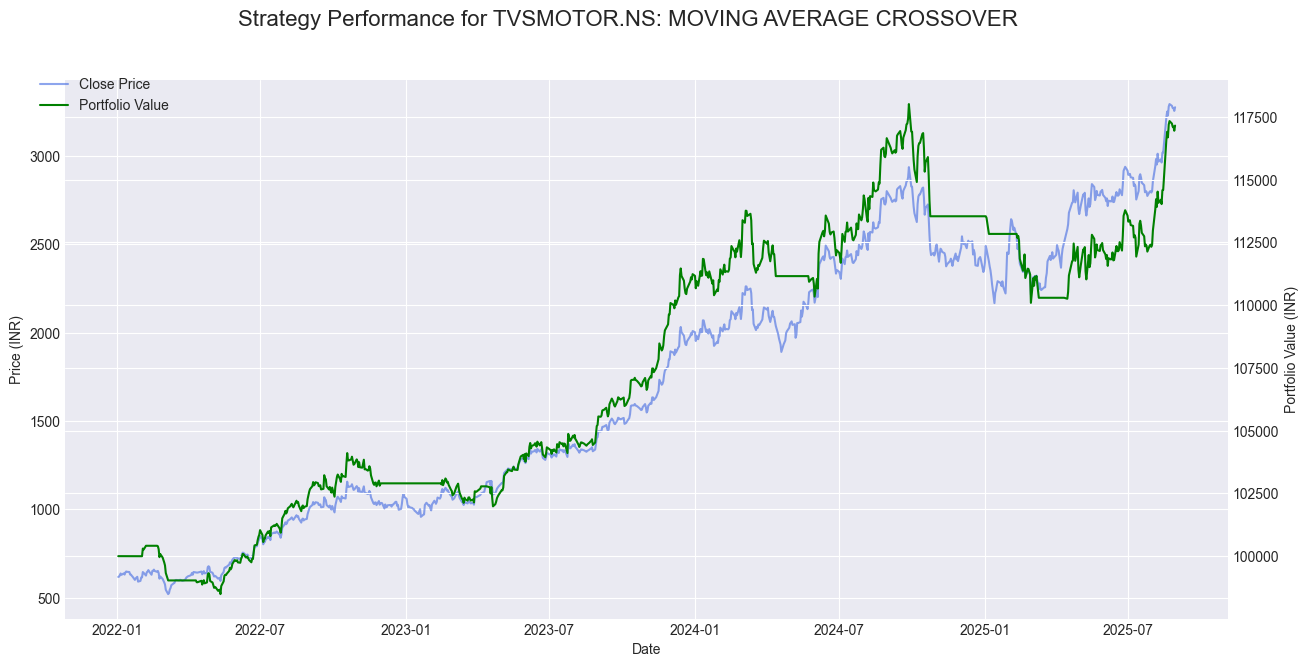


--- [RUNNING] BTST MODEL STRATEGY ---
BTST model eval on holdout: MSE=2755.4227, RMSE=52.4921, R2=0.9626
2024-12-12: BUY 1 TVSMOTOR.NS @ 2514.58 (cash 97484.42)
2024-12-13: SELL 1 TVSMOTOR.NS @ 2506.40 (cash 99989.81)
2024-12-17: BUY 2 TVSMOTOR.NS @ 2444.14 (cash 95100.53)
2024-12-18: SELL 2 TVSMOTOR.NS @ 2426.77 (cash 99953.07)
2024-12-19: BUY 2 TVSMOTOR.NS @ 2450.72 (cash 95050.63)
2024-12-20: SELL 2 TVSMOTOR.NS @ 2458.57 (cash 99966.77)
2024-12-20: BUY 2 TVSMOTOR.NS @ 2382.96 (cash 95199.84)
2024-12-23: SELL 2 TVSMOTOR.NS @ 2384.36 (cash 99967.57)
2024-12-27: BUY 2 TVSMOTOR.NS @ 2411.66 (cash 95143.25)
2024-12-30: SELL 2 TVSMOTOR.NS @ 2407.61 (cash 99957.47)
2024-12-30: BUY 2 TVSMOTOR.NS @ 2345.05 (cash 95266.36)
2024-12-31: SELL 2 TVSMOTOR.NS @ 2348.98 (cash 99963.32)
2025-01-03: BUY 2 TVSMOTOR.NS @ 2473.93 (cash 95014.46)
2025-01-06: SELL 2 TVSMOTOR.NS @ 2476.49 (cash 99966.43)
2025-01-06: BUY 2 TVSMOTOR.NS @ 2405.08 (cash 95155.26)
2025-01-07: SELL 2 TVSMOTOR.NS @ 2408.85 (cash 

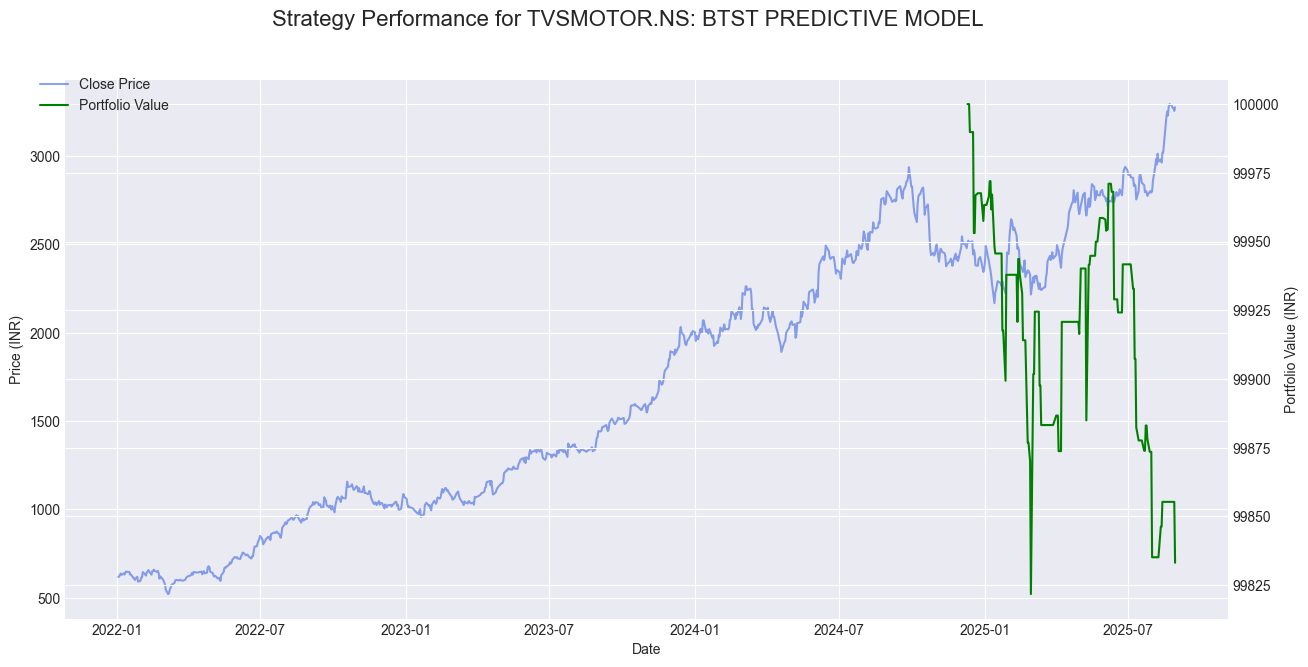

In [45]:
# paper_trading_improved.py
# Copy-paste and run as a single cell / .py file.

import math
from dataclasses import dataclass, field
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------
# Config (edit these)
# -----------------------------
SYMBOL = "TVSMOTOR.NS"
START_DATE = "2022-01-01"
END_DATE = "2025-08-30"
AUTO_ADJUST = True         # set False if you need raw OHLC
SHORT_WINDOW = 20
LONG_WINDOW = 50
INITIAL_CASH = 100_000.0

# BTST model params
BTST_THRESHOLD = 0.004     # predicted next-day return > this => BTST buy
BTST_TEST_SIZE = 0.20      # fraction for hold-out when training the model

# Execution slippage & commission
COMMISSION_PER_TRADE = 1.0    # flat rupee (or currency) per order
SLIPPAGE_PCT = 0.0005         # 0.05% slippage (0.0005)

# Position sizing
FIXED_QTY = 10                # default number of shares for moving-average strategy
BTST_ALLOC_PCT = 0.05         # BTST: allocate this fraction of current cash per trade

VERBOSE = True

# -----------------------------
# Paper broker (handles cash, positions, commission/slippage)
# -----------------------------
@dataclass
class PaperBroker:
    initial_cash: float = INITIAL_CASH
    cash: float = field(init=False)
    positions: dict = field(default_factory=dict)  # symbol -> qty
    trades: list = field(default_factory=list)

    def __post_init__(self):
        self.cash = float(self.initial_cash)

    def _apply_slippage_commission(self, price: float, qty: int, side: str):
        """Return effective_price, total_cost_or_proceeds for BUY/SELL after slippage+commission."""
        if side.upper() == "BUY":
            eff_price = price * (1.0 + SLIPPAGE_PCT)
            cost = eff_price * qty + COMMISSION_PER_TRADE
            return eff_price, cost
        else:  # SELL
            eff_price = price * (1.0 - SLIPPAGE_PCT)
            proceeds = eff_price * qty - COMMISSION_PER_TRADE
            return eff_price, proceeds

    def buy(self, symbol: str, qty: int, price: float, date: pd.Timestamp):
        qty = int(qty)
        eff_price, cost = self._apply_slippage_commission(price, qty, "BUY")
        if cost > self.cash:
            if VERBOSE:
                print(f"{date.date()}: Not enough cash to buy {qty} @ {price:.2f} (cost {cost:.2f}, cash {self.cash:.2f})")
            return False
        self.cash -= cost
        self.positions[symbol] = self.positions.get(symbol, 0) + qty
        self.trades.append({"date": date, "side": "BUY", "symbol": symbol, "qty": qty, "price": eff_price, "cash_after": self.cash})
        if VERBOSE:
            print(f"{date.date()}: BUY {qty} {symbol} @ {eff_price:.2f} (cash {self.cash:.2f})")
        return True

    def sell(self, symbol: str, qty: int, price: float, date: pd.Timestamp):
        qty = int(qty)
        available = self.positions.get(symbol, 0)
        if available < qty:
            if VERBOSE:
                print(f"{date.date()}: Not enough shares to sell ({available} available, requested {qty})")
            return False
        eff_price, proceeds = self._apply_slippage_commission(price, qty, "SELL")
        # add proceeds (which already subtracts commission)
        self.cash += proceeds
        self.positions[symbol] = available - qty
        if self.positions[symbol] == 0:
            del self.positions[symbol]
        self.trades.append({"date": date, "side": "SELL", "symbol": symbol, "qty": qty, "price": eff_price, "cash_after": self.cash, "pnl": proceeds - (eff_price*qty if False else 0)})
        if VERBOSE:
            print(f"{date.date()}: SELL {qty} {symbol} @ {eff_price:.2f} (cash {self.cash:.2f})")
        return True

    def get_portfolio_value(self, current_prices: dict):
        asset_value = sum(self.positions.get(sym, 0) * current_prices.get(sym, 0.0) for sym in self.positions.keys())
        return self.cash + asset_value

# -----------------------------
# Strategy 1: moving average crossover
# -----------------------------
def moving_average_crossover_strategy(data: pd.DataFrame, short_window: int, long_window: int):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0
    signals['short_ma'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    signals['long_ma'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    signals.loc[signals.index[short_window:], 'signal'] = np.where(
        signals['short_ma'][short_window:] > signals['long_ma'][short_window:], 1.0, 0.0
    )
    signals['positions'] = signals['signal'].diff().fillna(0.0)
    return signals

# -----------------------------
# Strategy 2: BTST using a simple regression model
# -----------------------------
def btst_model_strategy(data: pd.DataFrame, test_size=BTST_TEST_SIZE, threshold=BTST_THRESHOLD):
    # FIX: Work on a clean copy of the data. No need for complex reset_index calls.
    df = data.copy()

    # Create features
    df['lag1'] = df['Close'].shift(1)
    df['lag2'] = df['Close'].shift(2)
    df['ma7'] = df['Close'].rolling(7, min_periods=1).mean()
    df['vol7'] = df['Close'].rolling(7, min_periods=1).std().fillna(0)
    df['ret1'] = df['Close'].pct_change().fillna(0)

    # Target: next day's close
    df['target_next_close'] = df['Close'].shift(-1)

    # Drop rows w/ NaNs created by shifts
    df = df.dropna().copy()

    features = ['lag1', 'lag2', 'ma7', 'vol7', 'ret1']
    X = df[features].values
    y = df['target_next_close'].values

    # Train-test split (time order)
    n_test = max(1, int(len(X) * test_size))
    n_train = len(X) - n_test
    if n_train <= 0:
        raise RuntimeError("Not enough data to split for BTST model. Reduce test_size or expand date range.")

    X_train, X_test = X[:n_train], X[n_train:]
    y_train, y_test = y[:n_train], y[n_train:]
    idx_test = df.index[n_train:]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test).ravel()

    # Build result frame aligned to test index
    res = pd.DataFrame(index=idx_test)
    res['close'] = df.loc[idx_test, 'Close']
    res['open'] = df.loc[idx_test, 'Open']
    res['pred_next_close'] = y_pred
    res['pred_return_next'] = (res['pred_next_close'] - res['close']) / res['close']
    res['btst_signal'] = (res['pred_return_next'] > threshold).astype(int)

    # Model eval printout
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    if VERBOSE:
        print(f"BTST model eval on holdout: MSE={mse:.4f}, RMSE={rmse:.4f}, R2={r2:.4f}")

    return res, model

# -----------------------------
# Backtest runner
# -----------------------------
def run_backtest(data: pd.DataFrame, strategy_fn, broker: PaperBroker, symbol: str, strategy_name: str, **strategy_kwargs):
    
    # Helper to ensure a value is a scalar float
    def to_scalar(value):
        if isinstance(value, pd.Series):
            return value.item()
        return float(value)

    if strategy_name == "btst_model":
        res, model = strategy_fn(data, **strategy_kwargs)
        trades = []
        portfolio_vals = []
        for i, dt in enumerate(res.index):
            row = res.loc[dt]
            try:
                orig_pos = data.index.get_loc(dt)
                next_dt = data.index[orig_pos + 1]
            except (KeyError, IndexError):
                continue

            current_price = to_scalar(data.loc[dt, 'Close'])
            portfolio_vals.append({'date': dt, 'value': broker.get_portfolio_value({symbol: current_price})})

            if row['btst_signal'] == 1:
                buy_price = to_scalar(row['close'])
                alloc_cash = broker.cash * BTST_ALLOC_PCT
                if alloc_cash < buy_price:
                    if VERBOSE: print(f"{dt.date()}: Insufficient cash for BTST allocation.")
                    continue
                qty = int(max(1, math.floor(alloc_cash / buy_price)))
                
                if bought := broker.buy(symbol, qty, buy_price, dt):
                    sell_price = to_scalar(data.loc[next_dt, 'Open'])
                    broker.sell(symbol, qty, sell_price, next_dt)
                    trades.append({'buy_date': dt, 'sell_date': next_dt, 'qty': qty, 'buy_price': buy_price, 'sell_price': sell_price})
        
        last_price = to_scalar(data['Close'].iloc[-1])
        portfolio_vals.append({'date': data.index[-1], 'value': broker.get_portfolio_value({symbol: last_price})})
        return pd.DataFrame(portfolio_vals).set_index('date'), pd.DataFrame(trades)

    else: # Generic strategy (e.g., moving average)
        signals = strategy_fn(data, **strategy_kwargs)
        portfolio_vals = []
        for i in range(len(signals) - 1):
            dt = signals.index[i]
            pos_change = signals['positions'].iloc[i]
            
            exec_price = to_scalar(data['Open'].iloc[i + 1])
            
            if pos_change == 1.0:
                broker.buy(symbol, qty=FIXED_QTY, price=exec_price, date=dt)
            elif pos_change == -1.0 and symbol in broker.positions:
                broker.sell(symbol, qty=broker.positions[symbol], price=exec_price, date=dt)
            
            current_price = to_scalar(data['Close'].iloc[i])
            portfolio_vals.append({'date': dt, 'value': broker.get_portfolio_value({symbol: current_price})})

        last_price = to_scalar(data['Close'].iloc[-1])
        portfolio_vals.append({'date': data.index[-1], 'value': broker.get_portfolio_value({symbol: last_price})})
        return pd.DataFrame(portfolio_vals).set_index('date'), pd.DataFrame(broker.trades)

# -----------------------------
# Utility: Evaluate and plot results
# -----------------------------
def evaluate_and_plot(port_history: pd.DataFrame, trades_df: pd.DataFrame, data: pd.DataFrame, symbol: str, initial_cash: float, strategy_name: str):
    if port_history.empty:
        print("Empty portfolio history, cannot evaluate.")
        return
    
    final_value = port_history['value'].iloc[-1]
    total_return = (final_value / initial_cash) - 1.0
    returns = port_history['value'].pct_change().dropna()
    
    mean_r = returns.mean() if not returns.empty else 0.0
    std_r = returns.std() if not returns.empty else 0.0
    sharpe = (mean_r / std_r * np.sqrt(252)) if std_r > 0 else 0.0

    print("\n" + "="*25)
    print(f"PERFORMANCE: {strategy_name.upper()}")
    print("="*25)
    print(f"Initial Cash:          {initial_cash:,.2f}")
    print(f"Final Portfolio Value: {final_value:,.2f}")
    print(f"Total Return:          {total_return:.2%}")
    print(f"Annualized Sharpe Ratio: {sharpe:.2f}")
    print(f"Trades Executed:       {len(trades_df)}")

    fig, ax1 = plt.subplots(figsize=(15, 7))
    ax1.plot(data.index, data['Close'], label='Close Price', color='royalblue', alpha=0.6)
    ax1.set_xlabel("Date"); ax1.set_ylabel("Price (INR)")
    
    ax2 = ax1.twinx()
    ax2.plot(port_history.index, port_history['value'], label='Portfolio Value', color='green')
    ax2.set_ylabel("Portfolio Value (INR)")
    
    fig.suptitle(f'Strategy Performance for {symbol}: {strategy_name.upper()}', fontsize=16)
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.show()

# -----------------------------
# Main
# -----------------------------
if __name__ == "__main__":
    df = yf.download(SYMBOL, start=START_DATE, end=END_DATE, auto_adjust=AUTO_ADJUST)
    if df.empty:
        raise SystemExit(f"No data for {SYMBOL}")
    
    # FIX: Simplify data preparation. yfinance already returns a DatetimeIndex.
    df.index = pd.to_datetime(df.index)

    # 1) Moving-average strategy run
    print("\n--- [RUNNING] MOVING AVERAGE STRATEGY ---")
    broker1 = PaperBroker(initial_cash=INITIAL_CASH)
    port_hist_ma, trades_ma = run_backtest(df, moving_average_crossover_strategy, broker1, SYMBOL, strategy_name="ma_crossover", short_window=SHORT_WINDOW, long_window=LONG_WINDOW)
    evaluate_and_plot(port_hist_ma, trades_ma, df, SYMBOL, INITIAL_CASH, "Moving Average Crossover")
    if not trades_ma.empty:
        trades_ma.to_csv("trades_moving_average.csv", index=False)

    # 2) BTST model strategy run
    print("\n--- [RUNNING] BTST MODEL STRATEGY ---")
    broker2 = PaperBroker(initial_cash=INITIAL_CASH)
    port_hist_btst, trades_btst = run_backtest(df, btst_model_strategy, broker2, SYMBOL, strategy_name="btst_model", test_size=BTST_TEST_SIZE, threshold=BTST_THRESHOLD)
    evaluate_and_plot(port_hist_btst, trades_btst, df, SYMBOL, INITIAL_CASH, "BTST Predictive Model")
    if not trades_btst.empty:
        trades_btst.to_csv("trades_btst_model.csv", index=False)

